<a href="https://colab.research.google.com/github/devanshii09/Data-Science-Bootcamp/blob/main/Homework_8/assignment8_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8
## Name: Devanshi Bhavsar
## NetId : dnb7638

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

glass = pd.read_csv('glass.csv')
glass.head()
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
glass.Type.value_counts().sort_index()

,count
Type,
1,70
2,76
3,17
5,13
6,9
7,29


In [3]:

glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

,count
household,
0,163
1,51


In [4]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household


### Q1 . Try different thresholds for computing predictions using 'Al' column. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.

In [5]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

# Define thresholds to try
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Evaluate different thresholds
for threshold in thresholds:
    # Convert probabilities to binary predictions using the threshold
    predictions = (probs >= threshold).astype(int)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)

    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Threshold: 0.30, Accuracy: 0.81, Precision: 0.79, Recall: 0.69
Threshold: 0.40, Accuracy: 0.74, Precision: 0.78, Recall: 0.44
Threshold: 0.50, Accuracy: 0.74, Precision: 0.86, Recall: 0.38
Threshold: 0.60, Accuracy: 0.74, Precision: 1.00, Recall: 0.31
Threshold: 0.70, Accuracy: 0.70, Precision: 1.00, Recall: 0.19


### Q2. Do the same analysis for other columns

In [6]:
#elements
elements = ['RI','Na','Mg','Si','K','Ca','Ba','Fe']
for ele in elements:
    X= np.array(glass[ele]).reshape(-1,1)
    y = glass.household

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities
    probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

    # Define thresholds to try
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

    # Evaluate different thresholds
    for threshold in thresholds:
        # Convert probabilities to binary predictions using the threshold
        predictions = (probs >= threshold).astype(int)

        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        print(f"Element:{ele}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Element:RI, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Element:Na, Threshold: 0.30, Accuracy: 0.77, Precision: 0.71, Recall: 0.62
Element:Na, Threshold: 0.40, Accuracy: 0.81, Precision: 0.83, Recall: 0.62
Element:Na, Threshold: 0.50, Accuracy: 0.81, Precision: 0.90, Recall: 0.56
Element:Na, Threshold: 0.60, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element:Na, Threshold: 0.70, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element:Mg, Threshold: 0.30, Accuracy: 0.91, Precision: 0.88, Recall: 0.88
Element:Mg, Threshold: 0.40, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element:Mg, Threshold: 0.50, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element:Mg, Threshold: 0.60, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element:Mg, Threshold: 0.70, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element:Si, Threshold: 0.30, Accuracy: 0.67, Precision: 1.00, Recall: 0.12
Element:Si, Threshold: 0.40, Accuracy: 0.65, Precision: 1.00, Recall: 0.06
Element:Si, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Si, Threshold: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Element:K, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:K, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ca, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Ba, Threshold: 0.30, Accuracy: 0.77, Precision: 0.88, Recall: 0.44


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Element:Ba, Threshold: 0.40, Accuracy: 0.74, Precision: 0.86, Recall: 0.38
Element:Ba, Threshold: 0.50, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element:Ba, Threshold: 0.60, Accuracy: 0.70, Precision: 0.80, Recall: 0.25
Element:Ba, Threshold: 0.70, Accuracy: 0.70, Precision: 0.80, Recall: 0.25
Element:Fe, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Fe, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Fe, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Fe, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Fe, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

### Q3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding).

In [7]:
# Drop the target variable from the features
X = glass.drop(columns=['Type', 'household'])

# Target variable
y = glass['household']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8837209302325582


### Q4. Plot ROC Curves for each model

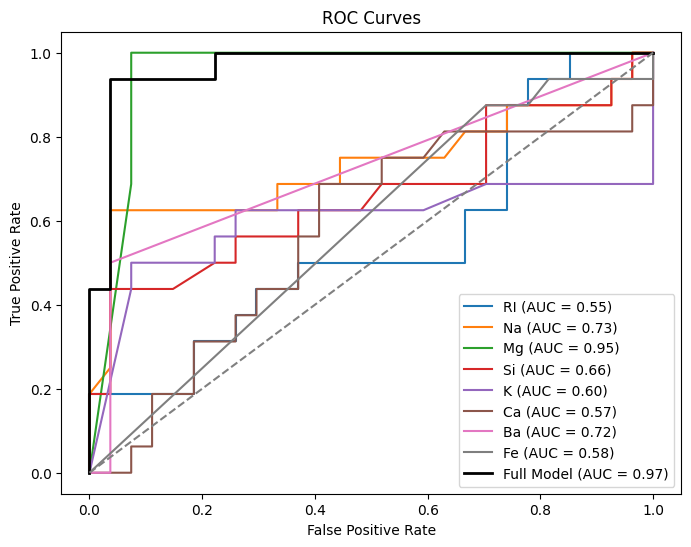

In [8]:

# Plot ROC Curves for univariate models
plt.figure(figsize=(8,6))
elements = ['RI','Na','Mg','Si','K','Ca','Ba','Fe']
for ele in elements:
    X = glass[[ele]]
    y = glass.household
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression().fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{ele} (AUC = {roc_auc:.2f})')

# Full model ROC
X = glass.drop(columns=['Type','household'])
y = glass.household
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Full Model (AUC = {roc_auc:.2f})', linewidth=2, color='black')

plt.plot([0,1],[0,1],'--', color='gray')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### Clustering
Repeat the above exercise for different values of k, compute inertia and silhouette scores, and compare scaled vs. unscaled features.

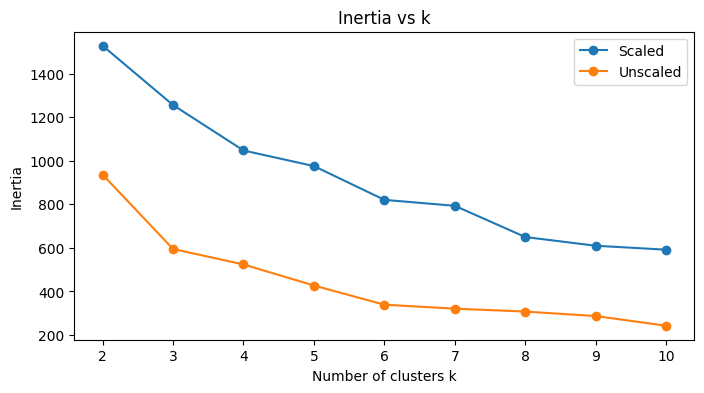

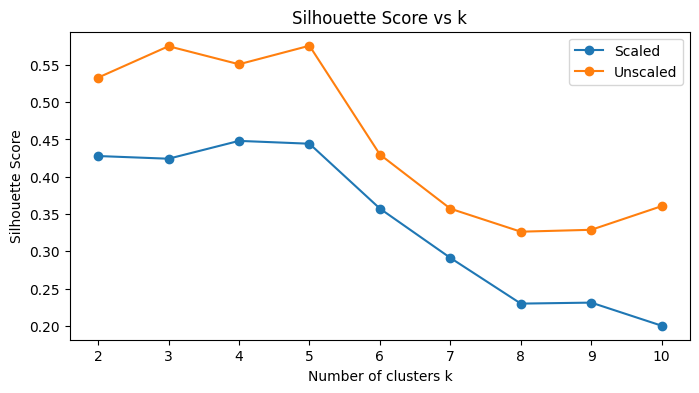

In [9]:

# Prepare data for clustering
X_cluster = glass.drop(columns=['Type','household'])

# With scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

ks = list(range(2, 11))
inertias_scaled = []
silhouettes_scaled = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias_scaled.append(kmeans.inertia_)
    silhouettes_scaled.append(silhouette_score(X_scaled, labels))

# Without scaling
X_noscale = X_cluster.values
inertias_noscale = []
silhouettes_noscale = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_noscale)
    inertias_noscale.append(kmeans.inertia_)
    silhouettes_noscale.append(silhouette_score(X_noscale, labels))

# Plot Inertia vs k
plt.figure(figsize=(8,4))
plt.plot(ks, inertias_scaled, marker='o', label='Scaled')
plt.plot(ks, inertias_noscale, marker='o', label='Unscaled')
plt.title('Inertia vs k')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Plot Silhouette Score vs k
plt.figure(figsize=(8,4))
plt.plot(ks, silhouettes_scaled, marker='o', label='Scaled')
plt.plot(ks, silhouettes_noscale, marker='o', label='Unscaled')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()
